# Chapter 3: Advanced data computation

In [1]:
import numpy as np
import xarray as xr

In [2]:
# When working in a Jupyter Notebook you might want to customize Xarray display settings to your liking
# The following settings reduce the amount of data displayed out by default
xr.set_options(display_expand_attrs=False, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

## Get the data

In [3]:
ds = xr.tutorial.load_dataset("air_temperature")
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes: (5)

Let's select to different datetimes.

In [4]:
ds1 = ds.isel(time=200)

In [5]:
ds2 = ds.isel(time=2000)

## Use `apply_ufunc` method  

The `apply_ufunc` method is used to apply function.

In [6]:
?xr.apply_ufunc

Signature:
xr.apply_ufunc(
    func: 'Callable',
    *args: 'Any',
    input_core_dims: 'Sequence[Sequence] | None' = None,
    output_core_dims: 'Sequence[Sequence] | None' = ((),),
    exclude_dims: 'Set' = frozenset(),
    vectorize: 'bool' = False,
    join: 'JoinOptions' = 'exact',
    dataset_join: 'str' = 'exact',
    dataset_fill_value: 'object' = <no-fill-value>,
    keep_attrs: 'bool | str | None' = None,
    kwargs: 'Mapping | None' = None,
    dask: "Literal['forbidden', 'allowed', 'parallelized']" = 'forbidden',
    output_dtypes: 'Sequence | None' = None,
    output_sizes: 'Mapping[Any, int] | None' = None,
    meta: 'Any' = None,
    dask_gufunc_kwargs: 'dict[str, Any] | None' = None,
    on_missing_core_dim: 'MissingCoreDimOptions' = 'raise',
) -> 'Any'
Docstring:
Apply a vectorized function for unlabeled arrays on xarray objects.

The function will be mapped over the data variable(s) of the input
arguments using xarray's standard rules for labeled computation, includin

Let's define the diff function

In [7]:
def diff(x, y):
    return x - y

Apply the function diff between `ds1` and `ds2`

In [8]:
xr.apply_ufunc(diff, ds1, ds2)

<xarray.Dataset> Size: 11kB
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Data variables:
    air      (lat, lon) float64 11kB -40.1 -40.9 -41.19 ... -1.7 -2.3 -1.5

Apply the function `diff` on `da1` with y=1. You can use \kwargs to pass arguments to the function.

In [9]:
xr.apply_ufunc(diff, ds1, kwargs={"y": 1},keep_attrs=True)

<xarray.Dataset> Size: 11kB
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
    time     datetime64[ns] 8B 2013-02-20
Data variables:
    air      (lat, lon) float64 11kB 228.6 227.4 226.6 ... 293.7 293.4 293.6
Attributes: (5)

## Use `apply_ufunc` method with dimension reduction

Let's define a function to compute mean

In [10]:
def wrapper(array, **kwargs):
    print(f"received {type(array)} shape: {array.shape}, kwargs: {kwargs}")
    result = np.mean(array, **kwargs)
    print(f"result.shape: {result.shape}")
    return result

Mean performs a dimension reduction so the shape of dataset changes. Applying apply_ufunc is more complicated.

In [11]:
xr.apply_ufunc(
    wrapper,
    ds,
    input_core_dims=[["time"]],
    kwargs={"axis": -1},
)

received <class 'numpy.ndarray'> shape: (25, 53, 2920), kwargs: {'axis': -1}
result.shape: (25, 53)


<xarray.Dataset> Size: 11kB
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Data variables:
    air      (lat, lon) float64 11kB 260.4 260.2 259.9 ... 297.3 297.3 297.3

## Compute with masked data

Use `where` to mask temperature greater than 270K on `ds1`

In [12]:
masked_ds1 = ds1.where(ds1 > 260)

Plot masked data

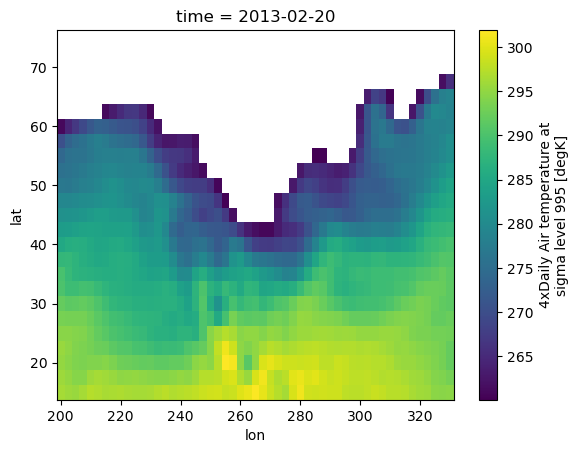

In [13]:
masked_ds1.air.plot()

Subtract 100 to masked data by applying `diff` function.

In [14]:
masked_ds1 = xr.apply_ufunc(diff, masked_ds1, 100, keep_attrs=True)

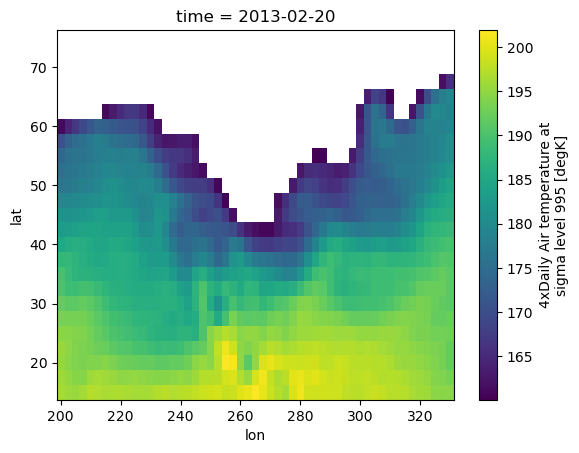

In [15]:
masked_ds1.air.plot()